***Plot the probability distributions of the pose of a marker***
Each observation implies a marker position in the world frame, if the nominal robot model is assumed exact. This script calculates the would be pose of the marker from each observation, and plots a curve approximateing an underlying PDF

In [15]:
import pickle
import numpy as np
from parameter_estimator import ParameterEstimator
import utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from robot import *

In [16]:
# import nominal positions of markers
with open('points.p', 'rb') as f:
    pointlist = pickle.load(f)  # deserialize using load()

nominal_locations = {}
nominal_locations_rounded = {}
for i, point in enumerate(np.array(pointlist).T):
    nominal_locations[i+1] = np.concatenate((point[0:3], np.zeros(1), point[3:5]))
    nominal_locations_rounded[i+1] = np.around(nominal_locations[i+1], 4)
#     print(f"{i+1}: {nominal_locations[i+1]}")
#     print(f"{i+1}: {nominal_locations_rounded[i+1]}\n")

    

In [17]:
def get_marker_locations(df):
    marker_locations = []
    theta_nom = RobotDescription.dhparams["theta_nom"].astype(float)
    d_nom = RobotDescription.dhparams["d_nom"].astype(float)
    r_nom = RobotDescription.dhparams["r_nom"].astype(float)
    alpha_nom = RobotDescription.dhparams["alpha_nom"].astype(float)
    for record in df.to_records():
        q = np.concatenate([record['q'], np.zeros(RobotDescription.dhparams['num_cam_extrinsic'])])
        _loc = RobotDescription.get_marker_location(record['mat'], q, theta_nom, d_nom, r_nom, alpha_nom)
        marker_location = RobotDescription.get_alternate_tfs(_loc)
        marker_locations.append(np.concatenate([marker_location['rvec'], marker_location['tvec']]))
    return marker_locations


In [30]:
# import observations from file

# select observations file
observations_file_select = 1
observations_file_str_dict = {1: r'observation_files/observations_simulated_20240109_081340.p'}

df_observations = pd.read_pickle(observations_file_str_dict[observations_file_select])
present_ids = list(set(list(df_observations['marker_id'].to_numpy())))
print(present_ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [42]:
df = df_observations[df_observations['marker_id']==1]
test = [utils.mat2rvectvec(m) for m in df['mat']]
test = np.array([np.concatenate([r,t]) for (r,t) in test])
print(test)

[[-0.07227878  0.39051226 -0.34670092 -0.3184993  -2.28773321  0.82851671]
 [ 0.18375334 -0.52400244  0.80152315  1.19840457 -2.18115468  0.50883255]
 [ 0.44929076 -0.78854338  1.097135    1.68014275 -1.99062426  0.25084311]]


/tmp/ipykernel_96922/4038494583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,0])


<AxesSubplot: ylabel='Density'>

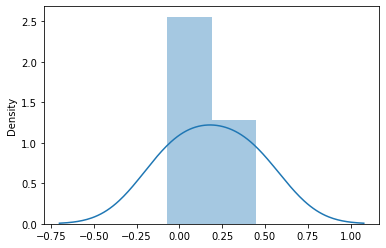

In [45]:
sns.distplot(test[:,0])